In [1]:
%cd /kaggle/working/
import os
if os.path.exists("CSE403_Deeplearning_FinalProject"):
    %cd CSE403_Deeplearning_FinalProject
    !git pull
else:
    !git clone https://github.com/zzonge0730/CSE403_Deeplearning_FinalProject.git
    %cd CSE403_Deeplearning_FinalProject

!pip uninstall -y tensorflow tensorboard keras tf-nightly tb-nightly
!pip install -r requirements.txt
!pip uninstall -y matplotlib
!pip install -q --no-binary matplotlib --no-deps --force-reinstall "matplotlib==3.9.1"
print("\n" + "="*30)
import numpy
import google.protobuf
print(f"NumPy 확인: {numpy.__version__}")
print(f"Protobuf 확인: {google.protobuf.__version__}")
print("="*30)

/kaggle/working
Cloning into 'CSE403_Deeplearning_FinalProject'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 158 (delta 86), reused 126 (delta 54), pack-reused 0 (from 0)
Receiving objects: 100% (158/158), 712.92 KiB | 13.20 MiB/s, done.
Resolving deltas: 100% (86/86), done.
/kaggle/working/CSE403_Deeplearning_FinalProject
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: tensorboard 2.18.0
Uninstalling tensorboard-2.18.0:
  Successfully uninstalled tensorboard-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ..

In [2]:
import yaml, os
import pathlib
# Config 파일 로드 (없으면 에러 방지용 폴더 생성)
config_path = "configs/config_wsl.yaml"
os.makedirs("configs", exist_ok=True)

# 파일이 있으면 읽고, 없으면 빈 딕셔너리로 시작
if os.path.exists(config_path):
    with open(config_path, 'r') as f:
        cfg = yaml.safe_load(f) or {}
else:
    cfg = {}
# Kaggle 데이터 경로 자동 탐색
data_path = None
candidates = [
    "/kaggle/input/realifake/Realifake",
    "/kaggle/input/realifake/realifake",
    "/kaggle/input/realifake/train",
    "/kaggle/input/realifake",
]
for p in candidates:
    if os.path.exists(p):
        data_path = p
        break
if data_path is None:
    raise FileNotFoundError(f"데이터 경로를 찾지 못했습니다. 후보: {candidates}")

base_cfg = yaml.safe_load(open("configs/config.yaml", encoding="utf-8"))
base_cfg["data"]["train_dir"] = data_path
base_cfg["data"]["test_dir"] = data_path
base_cfg["training"]["num_epochs"] = 10

tmp_cfg = pathlib.Path("/kaggle/working/config_kaggle.yaml")
tmp_cfg.write_text(yaml.safe_dump(base_cfg), encoding="utf-8")

print("데이터 경로:", data_path)
print("배치:", cfg["data"]["batch_size"], "epochs:", cfg["training"]["num_epochs"])

데이터 경로: /kaggle/input/realifake/Realifake
배치: 16 epochs: 1


In [3]:
import sys
import os

# 현재 디렉토리 확인
print(f"현재 작업 디렉토리: {os.getcwd()}")

# CNN 학습
print("\n" + "="*60)
print("CNN (ResNet-50) 학습 시작...")
print("="*60)
!python notebooks/02_train_cnn.py --config {tmp_cfg}

# ViT 학습
print("\n" + "="*60)
print("ViT (Vision Transformer) 학습 시작...")
print("="*60)
!python notebooks/03_train_vit.py --config {tmp_cfg}

# 모델 평가
print("\n" + "="*60)
print("모델 평가 수행 중...")
print("="*60)
!python notebooks/04_evaluate.py --config {tmp_cfg}

현재 작업 디렉토리: /kaggle/working/CSE403_Deeplearning_FinalProject

CNN (ResNet-50) 학습 시작...
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by

In [4]:
print("\n" + "="*60)
print("모델 평가 수행 중...")
print("="*60)
!python notebooks/04_evaluate.py --config {tmp_cfg}


모델 평가 수행 중...
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias us

In [5]:
   !pip install --no-deps --force-reinstall "numpy==1.26.4" "protobuf==3.20.3"
   import numpy as np
   print("NumPy:", np.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
NumPy: 1.26.4


In [6]:
from pathlib import Path
import yaml, os

# 1) Kaggle 데이터 경로 자동 탐색
candidates = [
    "/kaggle/input/realifake/Realifake",
    "/kaggle/input/realifake/realifake",
    "/kaggle/input/realifake/train",
    "/kaggle/input/realifake",
]
for p in candidates:
    if os.path.exists(p):
        data_path = p
        break
else:
    raise FileNotFoundError(f"데이터 경로를 찾을 수 없습니다. 후보: {candidates}")

# 2) 기본 config 불러와 Kaggle 값 덮어쓰기
base_cfg = yaml.safe_load(open("configs/config_wsl.yaml", encoding="utf-8"))
base_cfg["data"]["train_dir"] = data_path
base_cfg["data"]["test_dir"] = data_path
base_cfg["training"]["num_epochs"] = 10   # 필요시 수정
base_cfg["data"]["batch_size"] = 16      # 필요시 수정

# 3) Kaggle 전용 config 저장
tmp_cfg = Path("/kaggle/working/config_kaggle.yaml")
tmp_cfg.write_text(yaml.safe_dump(base_cfg), encoding="utf-8")

print("Kaggle config written to:", tmp_cfg)
print("데이터 경로:", data_path)
print("배치:", base_cfg["data"]["batch_size"], "epochs:", base_cfg["training"]["num_epochs"])
%cd /kaggle/working/CSE403_Deeplearning_FinalProject
!git pull

Kaggle config written to: /kaggle/working/config_kaggle.yaml
데이터 경로: /kaggle/input/realifake/Realifake
배치: 16 epochs: 10
/kaggle/working/CSE403_Deeplearning_FinalProject
Already up to date.


 시각화(Grad-CAM vs Attention Map) 생성 중...
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an 

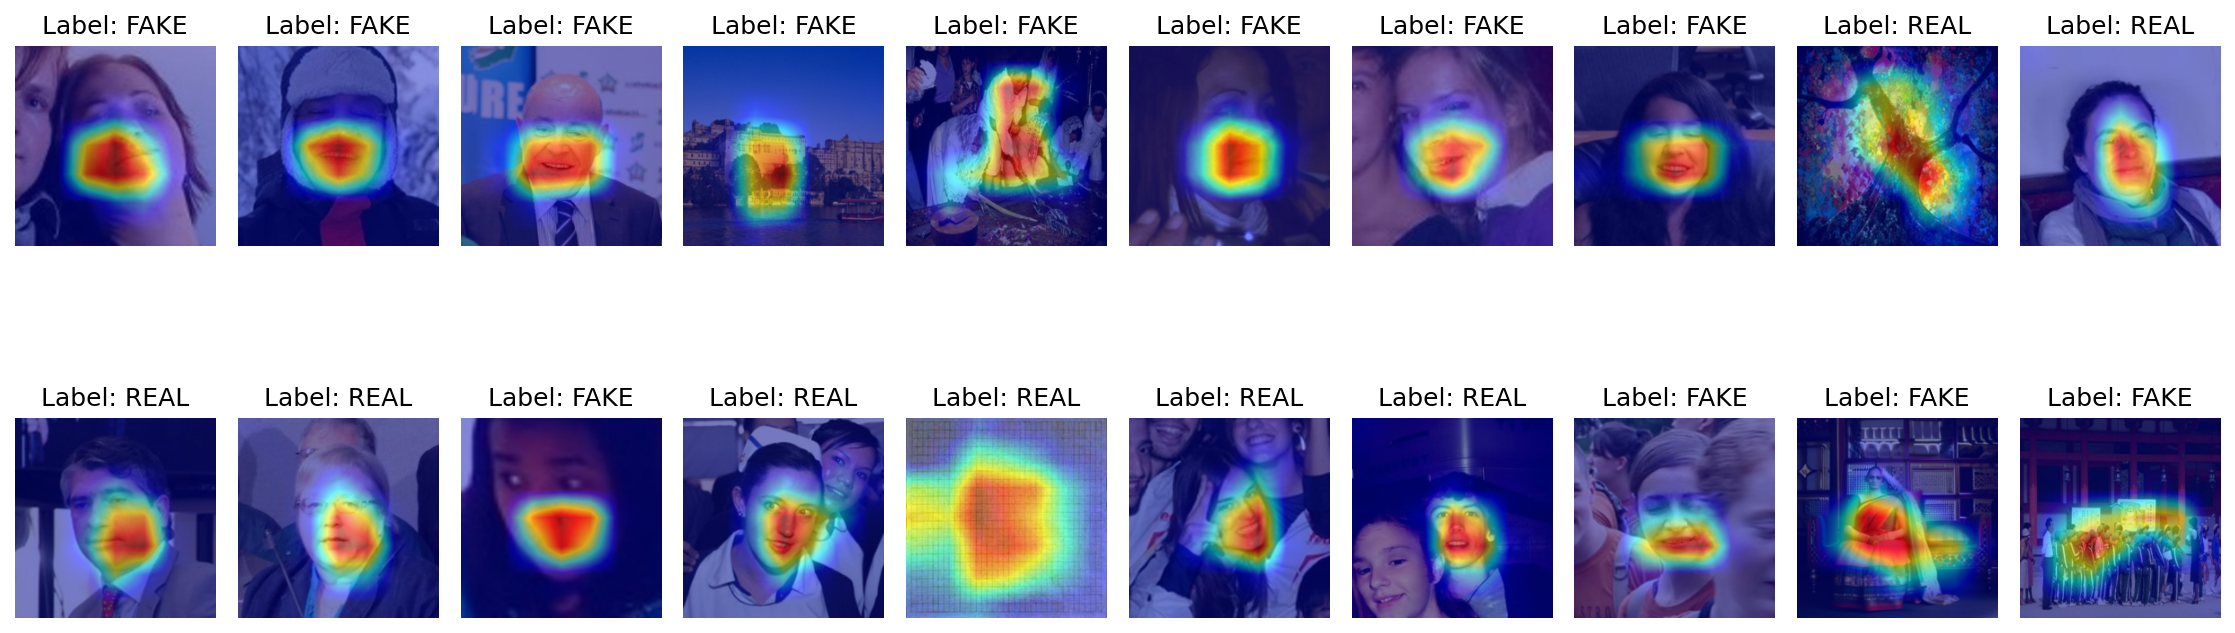

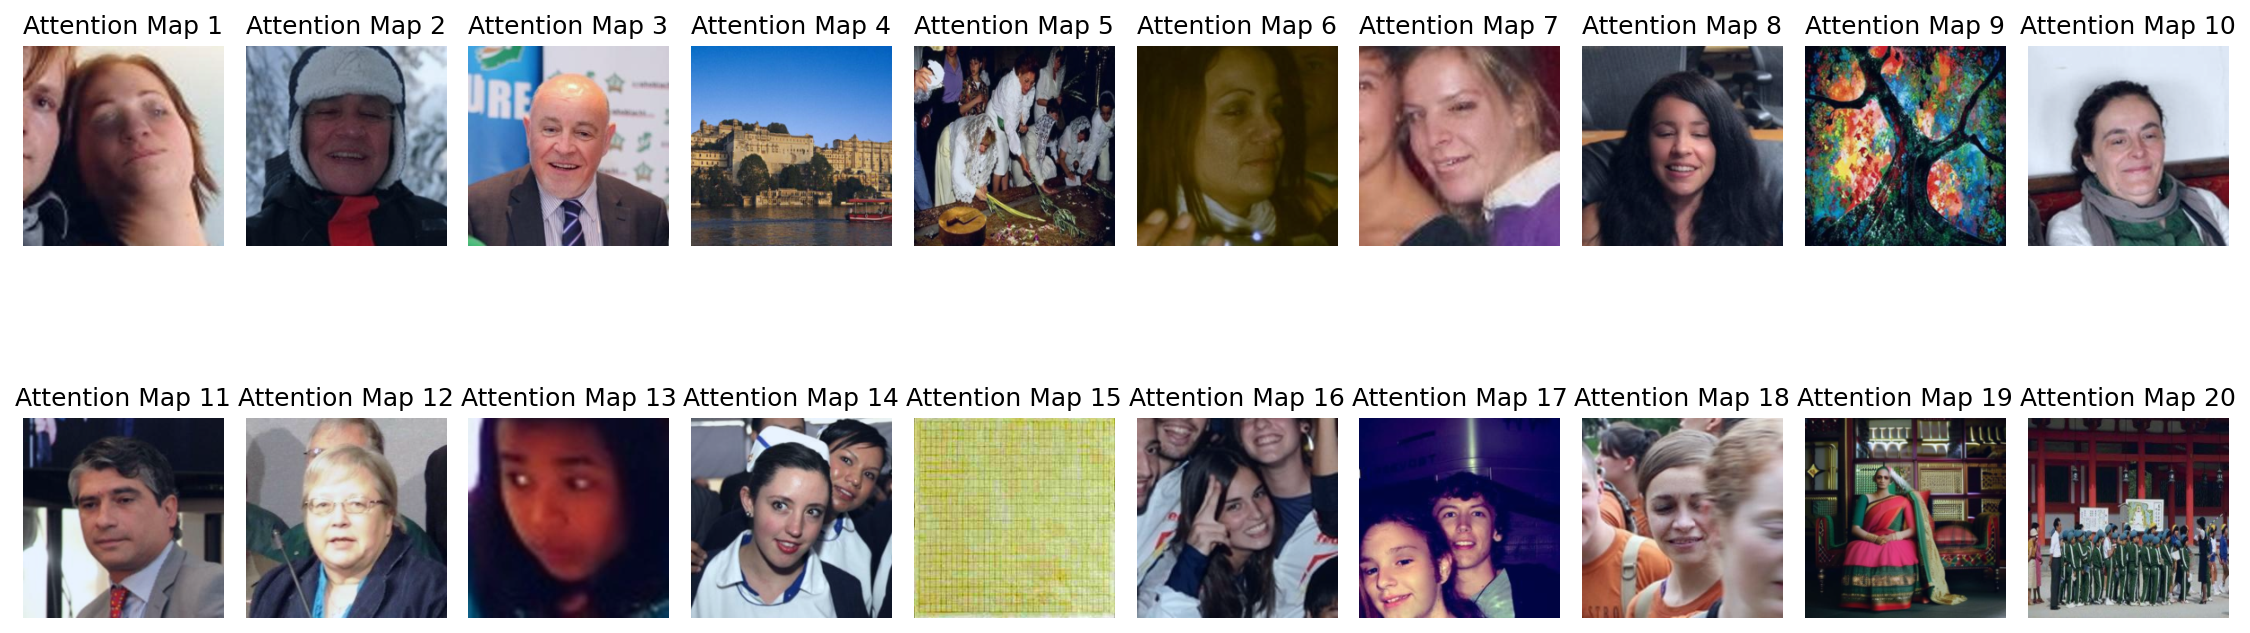

In [7]:

from IPython.display import Image, display
import glob, os

print(" 시각화(Grad-CAM vs Attention Map) 생성 중...")
!python notebooks/05_visualize.py --config /kaggle/working/config_kaggle.yaml

# 결과 이미지 노트북에 바로 출력
viz_dir = "results/visualizations"
pngs = sorted(glob.glob(os.path.join(viz_dir, "*.png")))

if pngs:
    print(f"{len(pngs)}개의 이미지 중 최대 10개 미리보기")
    for path in pngs[:10]:
        display(Image(filename=path))
else:
    print("시각화 이미지를 찾을 수 없습니다.")

Robustness (노이즈/압축) 테스트 수행 중...
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotat

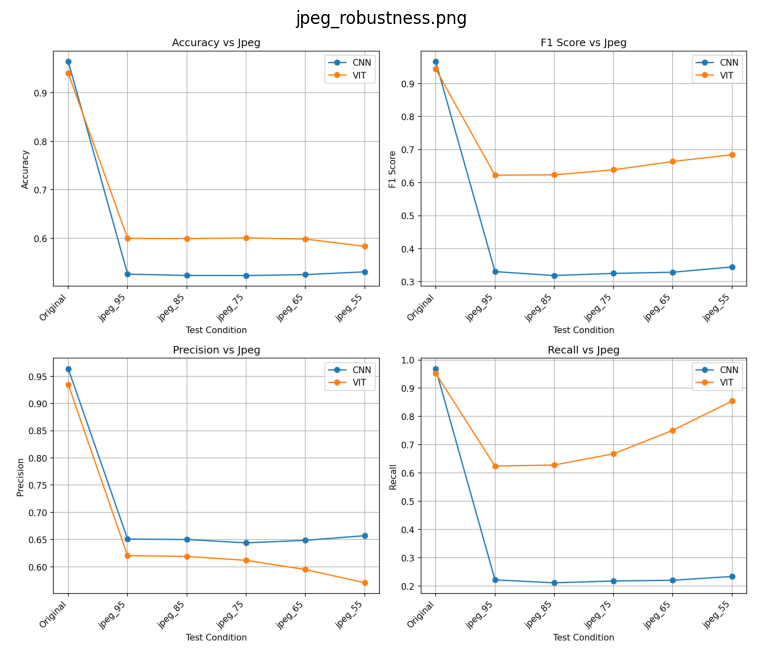

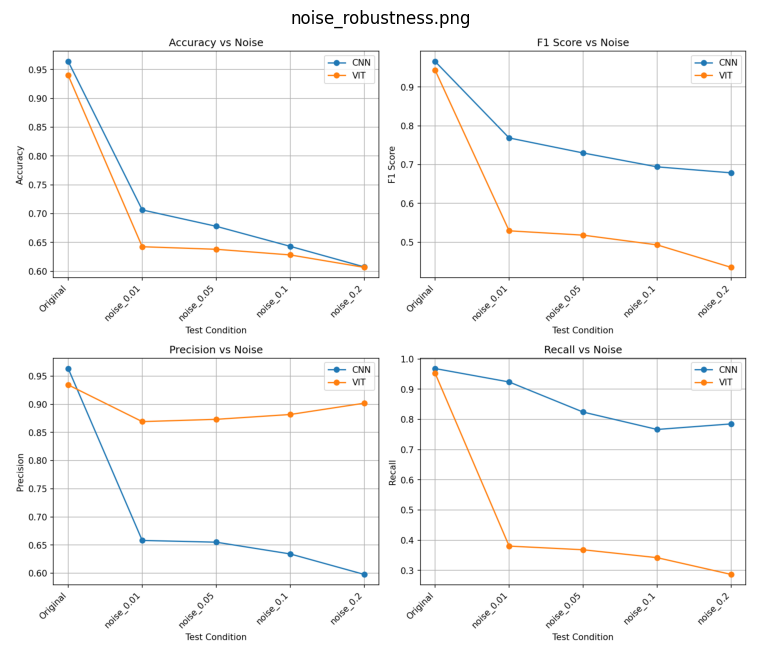

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os

print("Robustness (노이즈/압축) 테스트 수행 중...")
!python notebooks/06_robustness.py

# 결과 그래프 출력
robust_dir = "results/metrics"  
if os.path.exists(robust_dir):
    robust_files = sorted(glob.glob(os.path.join(robust_dir, "*robustness*.png")))
    if robust_files:
        print(f"\n✅ {len(robust_files)}개의 Robustness 그래프 생성됨")
        for img_path in robust_files:
            try:
                plt.figure(figsize=(12, 8))
                img = mpimg.imread(img_path)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"이미지 로드 실패: {img_path} - {e}")
    else:
        print("Robustness 그래프를 찾을 수 없습니다.")
else:
    print("결과 디렉토리를 찾을 수 없습니다.")

In [9]:
import pandas as pd
import os

print("효율성(속도/메모리) 측정 중...")
!python notebooks/07_efficiency.py

# 결과 테이블 출력
efficiency_csv = "results/metrics/efficiency_comparison.csv"  # ⚠️ 경로 수정
if os.path.exists(efficiency_csv):
    df = pd.read_csv(efficiency_csv)
    print("\n 효율성 비교 결과:")
    print(df.to_string(index=False))
else:
    print("효율성 결과 파일을 찾을 수 없습니다.")
    print(f"   예상 경로: {efficiency_csv}")

효율성(속도/메모리) 측정 중...
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type ali

In [10]:
from pathlib import Path
import os, json, shutil, yaml, warnings
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import Subset
from notebooks.data_pipeline import create_dataloaders
from utils.models import load_model
from utils.metrics import evaluate_model

CONFIG_PATH = "/kaggle/working/config_kaggle.yaml"  # 필요 시 수정
MAX_COPIES_PER_MODEL = 40  # 이미지 사본 저장 개수 제한

with open(CONFIG_PATH, encoding="utf-8") as f:
    config = yaml.safe_load(f)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 데이터 로더 준비
_, _, test_loader, class_names = create_dataloaders(
    data_dir=config["data"]["test_dir"] if os.path.exists(config["data"]["test_dir"]) else config["data"]["train_dir"],
    batch_size=config["data"]["batch_size"],
    img_size=config["data"]["img_size"]
)
if test_loader is None:
    raise RuntimeError("test_loader 생성 실패")

def resolve_path(dataset, idx):
    """Subset 계층을 따라가 실제 이미지 경로를 찾음."""
    cur_dataset, cur_idx = dataset, idx
    while isinstance(cur_dataset, Subset):
        cur_idx = cur_dataset.indices[cur_idx]
        cur_dataset = cur_dataset.dataset
    if hasattr(cur_dataset, "samples"):
        return cur_dataset.samples[cur_idx][0]
    if hasattr(cur_dataset, "imgs"):
        return cur_dataset.imgs[cur_idx][0]
    return None

def save_learning_curve(model_key):
    log_dir = Path(config["training"]["log_dir"])
    history_path = log_dir / f"{model_key}_history.json"
    if not history_path.exists():
        print(f"[{model_key}] history 파일이 없어 곡선을 건너뜁니다: {history_path}")
        return
    history = json.load(open(history_path, encoding="utf-8"))
    out_dir = Path(config["evaluation"]["save_dir"])
    out_dir.mkdir(parents=True, exist_ok=True)
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].plot(history["train_loss"], label="Train")
    axes[0].plot(history["val_loss"], label="Val")
    axes[0].set_title(f"{model_key.upper()} Loss")
    axes[0].set_xlabel("Epoch"); axes[0].set_ylabel("Loss"); axes[0].legend(); axes[0].grid(True)

    axes[1].plot(history["train_acc"], label="Train")
    axes[1].plot(history["val_acc"], label="Val")
    axes[1].set_title(f"{model_key.upper()} Accuracy")
    axes[1].set_xlabel("Epoch"); axes[1].set_ylabel("Accuracy (%)"); axes[1].legend(); axes[1].grid(True)

    out_path = out_dir / f"{model_key}_learning_curve.png"
    fig.tight_layout()
    fig.savefig(out_path, dpi=150, bbox_inches="tight")
    plt.close(fig)
    print(f"[{model_key}] 학습 곡선 저장: {out_path}")

def save_error_cases(model_key, model_cfg):
    ckpt = Path(config["training"]["save_dir"]) / f"{model_key}_{model_cfg['name']}_best.pth"
    if not ckpt.exists():
        print(f"[{model_key}] 체크포인트 없음: {ckpt}")
        return
    model = load_model(
        ckpt,
        model_type=model_key,
        model_name=model_cfg["name"],
        num_classes=model_cfg["num_classes"],
        device=device,
    )
    metrics, y_true, y_pred = evaluate_model(model, test_loader, device)
    print(f"[{model_key}] Test Accuracy={metrics['accuracy']:.4f}")

    error_dir = Path("results/error_cases") / model_key
    error_dir.mkdir(parents=True, exist_ok=True)

    rows, copied = [], 0
    for idx, (truth, pred) in enumerate(zip(y_true, y_pred)):
        if truth == pred:
            continue
        img_path = resolve_path(test_loader.dataset, idx)
        dest = None
        if img_path and copied < MAX_COPIES_PER_MODEL:
            dest = error_dir / f"{model_key}_{copied:03d}_true-{class_names[truth]}_pred-{class_names[pred]}{Path(img_path).suffix}"
            try:
                shutil.copy2(img_path, dest)
                copied += 1
            except Exception as exc:
                warnings.warn(f"이미지 복사 실패 ({img_path}): {exc}")

        rows.append({
            "dataset_index": idx,
            "image_path": img_path or "N/A",
            "copied_to": str(dest) if dest else "",
            "true_label": class_names[truth],
            "pred_label": class_names[pred],
        })

    csv_path = error_dir / f"{model_key}_misclassified.csv"
    pd.DataFrame(rows).to_csv(csv_path, index=False)
    print(f"[{model_key}] 오답 CSV 저장: {csv_path} (복사 {copied}장)")

for key in ("cnn", "vit"):
    save_learning_curve(key)
    save_error_cases(key, config["models"][key])

print("오답 노트 + 학습 곡선 생성 완료!")

Using device: cuda
데이터셋 로드 성공. 클래스: ['FAKE', 'REAL']
전체 이미지 수: 174425
분할 완료 -> Train: 139540, Val: 17442, Test: 17443
데이터 로더 워커 수: 2 (속도 최적화)
[cnn] 학습 곡선 저장: results/metrics/cnn_learning_curve.png
[cnn] 체크포인트 없음: models/cnn_resnet18_best.pth
[vit] 학습 곡선 저장: results/metrics/vit_learning_curve.png
[vit] 체크포인트 없음: models/vit_vit_small_patch16_224_best.pth
오답 노트 + 학습 곡선 생성 완료!


In [11]:
import os
from IPython.display import FileLink

# 결과 폴더 압축
print("결과 압축 중...")
!zip -r -q final_submission_results.zip results models 2>/dev/null || echo "일부 파일 압축 실패 (무시 가능)"

if os.path.exists("final_submission_results.zip"):
    file_size = os.path.getsize("final_submission_results.zip") / (1024 * 1024)  # MB
    print(f"✅ 압축 완료! 파일 크기: {file_size:.2f} MB")
    print("\n아래 링크를 클릭하여 결과를 다운로드하세요:")
    display(FileLink('final_submission_results.zip'))
else:
    print("압축 파일을 생성할 수 없습니다.")
    print("   개별 폴더를 수동으로 다운로드하세요:")
    print("   - results/")
    print("   - models/")

결과 압축 중...
✅ 압축 완료! 파일 크기: 2330.90 MB

아래 링크를 클릭하여 결과를 다운로드하세요:


/kaggle/working/CSE403_Deeplearning_FinalProject/final_submission_results.zip